In [2]:
import matplotlib.pyplot as plt
from main import ABC_algorithm
from FitnessEvaluator import *

In [4]:
COLONY_SIZE = 100
NUMBER_ITERATIONS = 1000
LEFT_BOUND = -100
RIGHT_BOUND = 100
SEARCH_SPACE_DIMENSIONS = 30
MAX_IMPROV_TRIES = COLONY_SIZE*SEARCH_SPACE_DIMENSIONS


fitnessEvaluator = SphereEvaluator()

In [7]:
def plot_cenario(X,Y):
    plt.figure()
    plt.plot(X,Y)
    plt.xlabel('Iterations')
    plt.xlabel('Best fitness')
    plt.show()

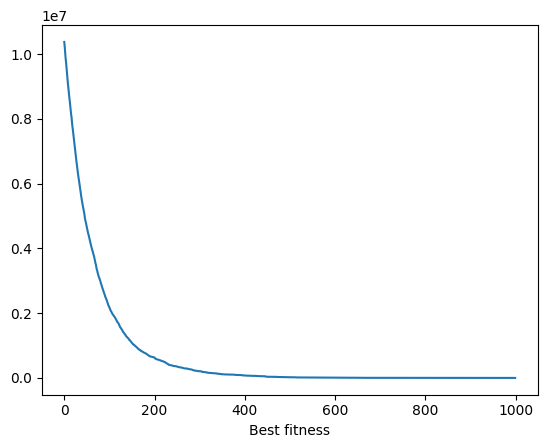

In [9]:
result = ABC_algorithm(COLONY_SIZE, LEFT_BOUND, RIGHT_BOUND, SEARCH_SPACE_DIMENSIONS, fitnessEvaluator, NUMBER_ITERATIONS, MAX_IMPROV_TRIES)
plot_cenario(result.keys(), result.values())